## 3. Inference & Visualization
- Use the trained model to predict on test images.
- Overlay predictions on original images.
- Use color masks (e.g., red for unhealthy areas) for visual clarity.

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
data = vipoooool_new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')

print('Data source import complete.')

Data source import complete.


In [2]:
import os
data = os.path.join(data, 'test', 'test')

## Importing Libraries

In [3]:
!pip install torch torchvision seaborn matplotlib pillow opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
import os
import cv2
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from torchvision import transforms
from PIL import Image
from tensorflow.keras.models import load_model

### Loading Model

In [21]:
model = tf.keras.models.load_model('/content/trained_model.keras')

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

### Visualizaing Single Image of Test set

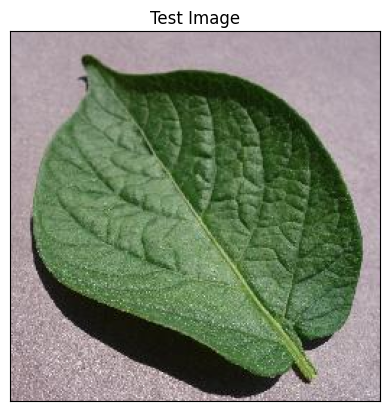

In [23]:
import cv2
image_path = os.path.join(data, "PotatoHealthy1.JPG")

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [25]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [26]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(array([[2.0537538e-10, 2.0339000e-10, 1.8628726e-14, 2.7130062e-08,
         6.5375366e-12, 1.5058795e-08, 1.6885144e-07, 2.0246452e-14,
         7.3654997e-14, 1.8375260e-16, 2.5246944e-15, 3.6524789e-14,
         1.5698822e-13, 1.7432431e-15, 3.9748143e-14, 9.8833074e-11,
         4.9394652e-11, 1.6226112e-11, 5.3396332e-11, 9.1429506e-08,
         3.1954036e-12, 3.6165071e-07, 9.9999928e-01, 2.3469909e-10,
         3.9235008e-08, 1.6873847e-14, 1.9461160e-15, 3.1085981e-11,
         4.6093524e-14, 1.7082767e-12, 6.8725876e-12, 1.7524001e-12,
         4.2064961e-14, 2.2848457e-12, 7.5285711e-10, 6.5125860e-15,
         3.3973640e-13, 1.2616329e-13]], dtype=float32),
 (1, 38))

In [27]:
result_index = np.argmax(prediction)
result_index

np.int64(22)

In [28]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

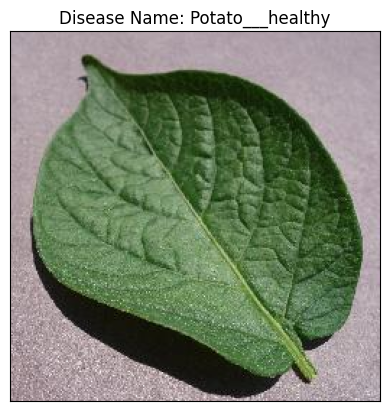

In [36]:
# Displaying result of disease prediction on test image
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
print("Prediction:",model_prediction)

Prediction: Potato___healthy


# Classification + Segmentation + Visualization

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


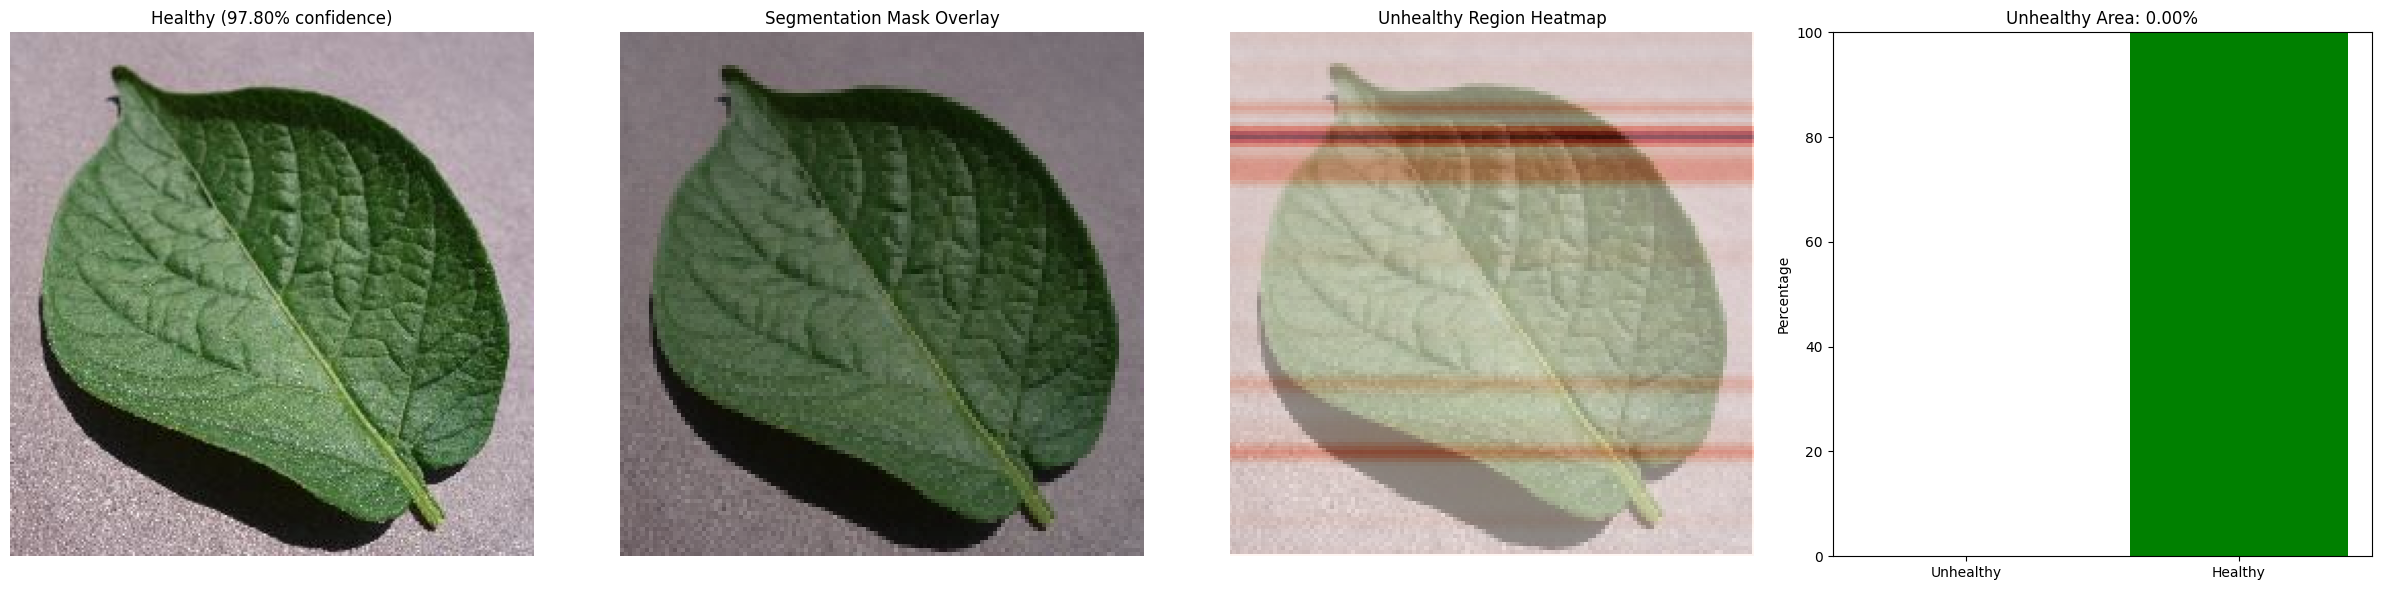

In [43]:
# === Load classification and segmentation model ===
model_path = "/content/trained_model.keras"
model = load_model(model_path)

# === Preprocess image ===
def preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    # Add a check to see if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Error loading image: {image_path}. Please check if the file exists.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(image_rgb, target_size)
    normalized = resized / 255.0
    return image_rgb, np.expand_dims(normalized, axis=0), resized

# === Classification Prediction ===
def classify_health(model, input_tensor):
    pred = model.predict(input_tensor)
    # Assuming binary classification output, adjust if needed
    label = "Unhealthy" if pred[0][0] > 0.5 else "Healthy"
    confidence = pred[0][0] if label == "Unhealthy" else 1 - pred[0][0]
    return label, confidence

# === Segmentation Prediction ===
def predict_mask(model, input_tensor, target_size=(128, 128), threshold=0.5):
    pred_mask = model.predict(input_tensor)
    # Ensure mask is 2D for resizing
    raw_mask = np.squeeze(pred_mask)
    # Ensure resized_mask has the correct dimensions for heatmap visualization later
    resized_mask = cv2.resize(raw_mask, target_size, interpolation=cv2.INTER_LINEAR) # Use interpolation appropriate for masks
    binary_mask = (resized_mask > threshold).astype(np.uint8)
    return binary_mask, resized_mask

# === Visualization ===
def visualize_all(original_img, resized_img, binary_mask, raw_mask, label, confidence):
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))

    # 1. Classification Result
    axs[0].imshow(original_img)
    axs[0].set_title(f"{label} ({confidence * 100:.2f}% confidence)")
    axs[0].axis("off")

    # 2. Overlay mask
    overlay = resized_img.copy()
    # Ensure overlay has 3 channels for coloring
    overlay = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR) # Convert to BGR for cv2 operations
    mask_color = np.zeros_like(overlay)
    mask_color[:, :] = [0, 0, 255] # Red in BGR
    # Ensure binary_mask is compatible shape for bitwise_and
    mask_overlay = cv2.bitwise_and(mask_color, mask_color, mask=binary_mask)
    overlay = cv2.addWeighted(overlay, 0.7, mask_overlay, 0.3, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB) # Convert back to RGB for matplotlib

    axs[1].imshow(overlay_rgb)
    axs[1].set_title("Segmentation Mask Overlay")
    axs[1].axis("off")

    # 3. Heatmap
    axs[2].imshow(resized_img)
    # Ensure raw_mask is 2D for heatmap
    sns.heatmap(raw_mask, cmap="Reds", alpha=0.5, ax=axs[2], cbar=False)
    axs[2].set_title("Unhealthy Region Heatmap")
    axs[2].axis("off")

    # 4. Area chart
    unhealthy_percent = np.sum(binary_mask) / binary_mask.size * 100
    axs[3].bar(["Unhealthy", "Healthy"], [unhealthy_percent, 100 - unhealthy_percent], color=["red", "green"])
    axs[3].set_ylim(0, 100)
    axs[3].set_title(f"Unhealthy Area: {unhealthy_percent:.2f}%")
    axs[3].set_ylabel("Percentage")

    plt.tight_layout()
    plt.show()

# === Main Function ===
def full_inference(image_path, model):
    orig, input_tensor, resized = preprocess_image(image_path)
    label, confidence = classify_health(model, input_tensor)
    binary_mask, raw_mask = predict_mask(model, input_tensor, target_size=resized.shape[:2]) # Pass resized shape
    visualize_all(orig, resized, binary_mask, raw_mask, label, confidence)

# === Run Example ===
# Use the 'data' variable from previous cells to construct the correct path
test_image_name = "PotatoHealthy1.JPG"
sample_path = os.path.join(data, test_image_name)

full_inference(sample_path, model)